In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

#import helper functions

torch.__version__
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(128)
device

'cpu'

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

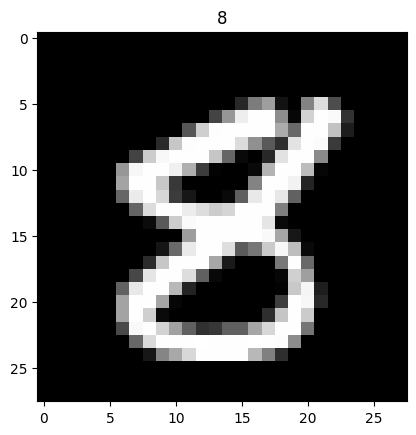

In [2]:
#Visualising data
# Download the dataset first
train_data = datasets.MNIST("~/data", train=True, download=True)
test_data = datasets.MNIST("~/data", train=False, download=True)

train_loader = DataLoader(
        datasets.MNIST("./data", train=True, download=True, transform=ToTensor()),
        batch_size=64,
        shuffle=True)
test_loader = DataLoader(
        datasets.MNIST("./data", train=False, download=True, transform=ToTensor()),
        batch_size=64,
        shuffle=True)
images, labels = next(iter(train_loader))
img, label = images[0], labels[0]
plt.title(label.item())
plt.imshow(img.squeeze(), cmap="gray")

In [58]:
#! Unable to 
#Familier model, best 98.69% epoch 6
#nn.CrossEntropyLoss(),
#optim.Adam(params=model_0.parameters(), lr=0.001, weight_decay=0.001),

class digit_classifier(nn.Module):
  def __init__(self, hidden=10):
    super(digit_classifier, self).__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=hidden, kernel_size=3, stride=1, padding=1),#28
        nn.LeakyReLU(),
        nn.Conv2d(in_channels=hidden, out_channels=hidden, kernel_size=3, stride=1, padding=1),#28
        nn.LeakyReLU(),
        #Don't work with onnx?
        nn.MaxPool2d(kernel_size=2, stride=2)#14/2
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden, hidden, kernel_size=3, stride=1, padding=1),#14
        nn.LeakyReLU(),
        nn.Conv2d(hidden, hidden, kernel_size=3, stride=1, padding=1),#14
        nn.LeakyReLU(),
        #Don't work with onnx?
         nn.MaxPool2d(kernel_size=2, stride=2)#14/2

       
    )
    self.output = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden*7*7, len(train_data.classes))
    )
  def forward(self, x):
    x = self.block_1(x)
    x = self.block_2(x)
    x =  self.output(x)
    #! Don't use softmax, stabilty reason? 
    return x
model_0 = digit_classifier(10).to(device) #Only one input channel

In [60]:
import help
import importlib
importlib.reload(help)
from help import train_step
from help import test_step
epochs = 6

for epoch in range(epochs):
  print(f"Epoch {epoch+1}\n--------")
  train_step(model_0, train_loader,
           nn.CrossEntropyLoss(),
           optim.SGD(params=model_0.parameters(), lr=0.001, momentum=0.9),
           device)

  test_step(model_0, test_loader,
           nn.CrossEntropyLoss(),
           device)
        

Epoch 1
--------
train: 2.295548915863037, 13.186300639658848%, 0.16058723628520966
test: 2.265974760055542, 28.81170382165605%
Epoch 2
--------
train: 0.7318063974380493, 79.14445628997868%, 19.50633430480957
test: 0.2507980763912201, 92.38654458598727%
Epoch 3
--------
train: 0.2001560628414154, 93.9282382729211%, 22.285415649414062
test: 0.15519081056118011, 95.10350318471338%
Epoch 4
--------
train: 0.1364661455154419, 95.83388859275053%, 24.94687843322754
test: 0.10272224247455597, 96.81528662420382%
Epoch 5
--------
train: 0.1095242127776146, 96.57682569296375%, 27.76140785217285
test: 0.08631037920713425, 97.24323248407643%
Epoch 6
--------
train: 0.09451047331094742, 97.12986407249467%, 28.711715698242188
test: 0.07928948104381561, 97.49203821656052%


{'0 - zero': -14.473622, '1 - one': -15.439084, '2 - two': -9.398322, '3 - three': -6.133123, '4 - four': -16.170988, '5 - five': -7.997078, '6 - six': -20.860445, '7 - seven': -18.617214, '8 - eight': -0.0026064492, '9 - nine': -11.239262}


Text(0.5, 1.0, 'True: 8 - eight \n Prediction: 8 - eight')

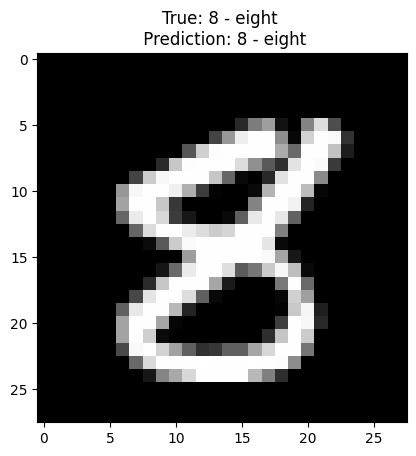

In [54]:
#Making some predictions
model_0.to(device="cpu")
model_0.eval()
with torch.inference_mode():
    y_logit = model_0(img.unsqueeze(1))
    # Get prediction probability (logit -> prediction probability)
    pred_prob = nn.LogSoftmax(dim=1)

    #print(pred_prob(y_logit/5).squeeze().numpy())
    #print(class_names)
    print(dict(zip(train_data.classes, pred_prob(y_logit).squeeze().numpy()))) #? Why /5

    # Get pred_prob off GPU for further calculations
    y_pred = y_logit.argmax(dim=1)
model_0.to(device=device)
plt.imshow(img.squeeze(), cmap="gray")
plt.title(f'True: {train_data.classes[label]} \n Prediction: {train_data.classes[y_pred]}')

In [56]:
x = torch.zeros(1,1,28,28)
model_0.eval()

torch.onnx.export(model_0,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "model_0.onnx",   # where to save the model (can be a file or file-like object)
                  opset_version=9,          # the ONNX version to export the model to
                  verbose=True,        # store the trained parameter weights inside the model file
                  )


x.shape

============== Diagnostic Run torch.onnx.export version 2.0.0+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



torch.Size([1, 1, 28, 28])